Machine Learning for Mechanical Engineering
Assignment - 1
ME21B006

Code is deployed on https://github.com/HonestFreak/MLME-Assignment1 too

Iteration 0: Cost = 9.373053985507246, R-squared = -2.672737633338405
Iteration 100: Cost = 0.19336321793256972, R-squared = 0.924232553391622
Iteration 200: Cost = 0.023701959106138017, R-squared = 0.9907126239401202
Iteration 300: Cost = 0.01899785290074506, R-squared = 0.9925558809957694


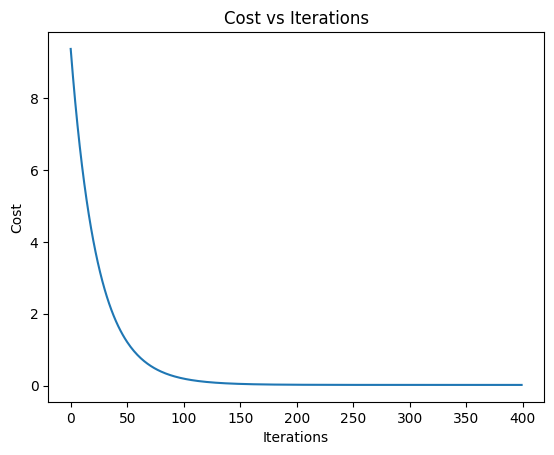

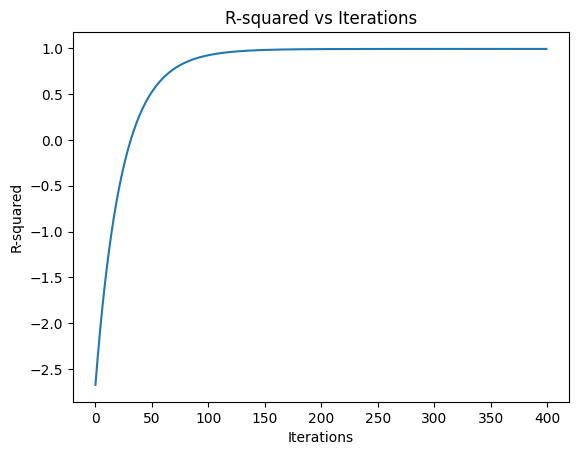

Mean Squared Error (MSE) on Test Set: 0.1172121970094277
Mean Absolute Error (MAE) on Test Set: 0.247028743400523
R-squared on Test Set: 0.9490298023658357


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_r_squared(y_true, y_pred):
    mean_y_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y_true)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)
    return r_squared

# Loading the data
data = pd.read_csv('data.csv')

# Extracting features and target variable
X = data[['Number of shells', 'Infill density', 'Layer thickness', 'Printing time(min)', 'Filament spent(gr)', 'Nominal Dimension']]
y = data['Printed Dimension']

# Preprocessing of data
X = (X - X.mean()) / X.std()  # Standardize the features

# Add bias term to the features
X['bias'] = 1

# Convert to numpy arrays
X = X.values
y = y.values

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(split_ratio * len(data))

X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Learning rate and number of iterations
alpha = 0.01
iterations = 400

# Lists to store metrics for each iteration
cost_history = []
r_squared_history = []

# Gradient Descent
for i in range(iterations):
    # Predictions
    predictions = np.dot(X_train, weights)
    cost = np.mean((predictions - y_train)**2)  # Calculate the cost (mean squared error)
    r_squared = calculate_r_squared(y_train, predictions)   # Calculate the coefficient of determination (R-squared)
    gradient = (2/len(y_train)) * np.dot(X_train.T, (predictions - y_train))   # Calculate the gradient of the cost function
    weights -= alpha * gradient     # Update weights
    cost_history.append(cost)       # Append metrics to history
    r_squared_history.append(r_squared)

    # Print the cost and R-squared every 100 iterations
    if i % 100 == 0:
        print(f"Iteration {i}: Cost = {cost}, R-squared = {r_squared}")

# Predictions on the test set
predictions_test = np.dot(X_test, weights)

# Compute metrics on the test set
mse_test = np.mean((predictions_test - y_test)**2)
mae_test = np.mean(np.abs(predictions_test - y_test))
r_squared_test = calculate_r_squared(y_test, predictions_test)

# Plotting cost vs iterations
plt.plot(range(iterations), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Plotting R-squared values
plt.plot(range(iterations), r_squared_history)
plt.xlabel('Iterations')
plt.ylabel('R-squared')
plt.title('R-squared vs Iterations')
plt.show()

# Print metrics on the test set
print(f'Mean Squared Error (MSE) on Test Set: {mse_test}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae_test}')
print(f'R-squared on Test Set: {r_squared_test}')


Scikit-Learn Results:
Mean Squared Error (MSE) on Test Set: 0.03512350625784341
Mean Absolute Error (MAE) on Test Set: 0.14520597021732318
R-squared on Test Set: 0.9847447689199277


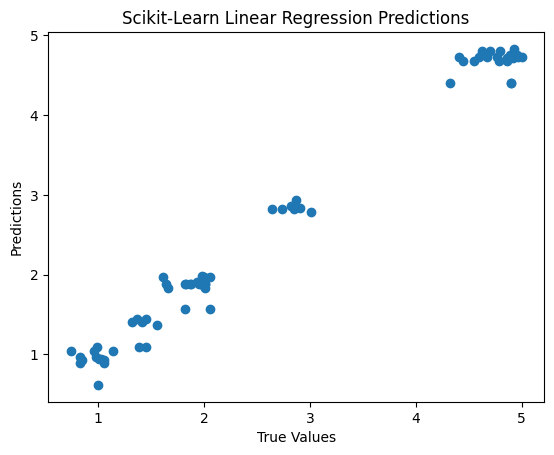

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data.csv')

# Extracting features and target variable
X = data[['Number of shells', 'Infill density', 'Layer thickness', 'Printing time(min)', 'Filament spent(gr)', 'Nominal Dimension']]
y = data['Printed Dimension']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
predictions_test = model.predict(X_test)

# Computing metrics on the test set
mse_test = mean_squared_error(y_test, predictions_test)
mae_test = mean_absolute_error(y_test, predictions_test)
r_squared_test = r2_score(y_test, predictions_test)

print(f'Scikit-Learn Results:')
print(f'Mean Squared Error (MSE) on Test Set: {mse_test}')
print(f'Mean Absolute Error (MAE) on Test Set: {mae_test}')
print(f'R-squared on Test Set: {r_squared_test}')

# Comparing with your custom implementation results
plt.scatter(y_test, predictions_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Scikit-Learn Linear Regression Predictions')
plt.show()
